## Carga de datos

In [125]:
import warnings

warnings.filterwarnings('ignore')

In [126]:
import pandas as pd
import numpy as np
import plotnine as ptn
from plotnine import *

In [127]:
path = "https://raw.githubusercontent.com/dfborda1373/MIAD_APRENDIZAJE_NOSUPERVISADO/main/DATA/FINAL/Datos%20Crudos.csv"
datos_o = pd.read_csv(path)

datos_o.head()

LINEA   T_internal       T_Mtto      T_Aseos     T_CO&SUP   T_External  \
0  DO31_L501  17.68527778  8.558055556  6.629444444  47.92444444  0.201666667   
1  DO31_L502  3.215277778  2.116666667  2.743055556  287.3422222  0.766666667   
2  DO31_L503  24.15083333  20.74305556  10.10555556  36.57916667  6.268333333   
3  DO31_L504            0         #N/D         #N/D         #N/D            0   
4  DO31_L505  69.55027778  23.27861111  18.97805556  196.1386111  3.662222222   

   NST_Demanda NST_Material NST_Engeneering    NST_Other  ...   Automatic  \
0  488.3858333  4.226388889            #N/D  47.92444444  ...  Habilitado   
1  374.8891667         #N/D            #N/D  287.3422222  ...  Habilitado   
2  437.1236111         #N/D            #N/D  36.57916667  ...  Habilitado   
3          744         #N/D            #N/D         #N/D  ...  Habilitado   
4  72.07194444         #N/D            #N/D  196.1386111  ...  Habilitado   

        GLY       LEF  OEE META_GLY META_LEF  META_ST           ST   TT  \
0       79%       90%  21%        0        0        0  203.4633333  744   
1       85%       96%   9%        0        0        0  81.76861111  744   
2       74%       89%  27%  60.8278  76.1587  432.186  270.2972222  744   
3  #¡DIV/0!  #¡DIV/0!   0%        0        0        0            0  744   
4       73%       83%  47%    60.67   77.765  418.625  475.7894444  744   

     NST TOTAL  
0  540.5366667  
1  662.2313889  
2  473.7027778  
3          744  
4  268.2105556  

[5 rows x 24 columns]

### Tratamiento inicial de los datos

In [128]:
# Se descartan inicialmente las columnas 'Regional' y 'País'
datos_c = datos_o.drop(columns=['Regional', 'País'])

# Se reemplazan los datos faltantes '#N/D' con 0. 
datos_c = datos_c.replace("#N/D", 0)

# Se reemplazan los datos "#¡DIV/0!"
datos_c = datos_c.replace("#¡DIV/0!", 0)

# Se generan Dummuies a la columna Automatic
datos_c.Automatic = (datos_c.Automatic == 'Habilitado')*1

# Se convierten los datos almacenados como string a valor numérico
    #GLY
datos_c.GLY = datos_c.GLY.str.strip('%').astype('float')
    #LEF
datos_c.LEF = datos_c.LEF.str.strip('%').astype('float')
    #OEE
datos_c.OEE = datos_c.OEE.str.strip('%').astype('float')

# Se transforman todas las columnas a datos de tipo float
for columna in list(datos_c.columns)[1:]:
    datos_c.loc[:,columna] = datos_c.loc[:,columna].astype(float)

# Se eliminan las líneas con TT = 0
datos_c = datos_c[datos_c.TT != 0]
# Se eliminan las líneas con TT = 0
datos_c = datos_c[datos_c.ST != 0]


# Se desea identificar las líneas que cumplieron su metas asociadas a cada KPI (GLY, LEF, ST)
datos_c.loc[:,'cump_GLY'] = datos_c.GLY / datos_c.META_GLY
datos_c.loc[:,'cump_LEF'] = datos_c.LEF / datos_c.META_LEF
datos_c.loc[:,'cump_ST']  = datos_c.ST / datos_c.META_ST

# Se reemplazan los NAs resultantes con 0
datos_c.fillna(0, inplace= True)
datos_c.replace([np.inf, -np.inf], 1, inplace=True)
datos_c.head()

LINEA  T_internal     T_Mtto    T_Aseos    T_CO&SUP  T_External  \
0  DO31_L501   17.685278   8.558056   6.629444   47.924444    0.201667   
1  DO31_L502    3.215278   2.116667   2.743056  287.342222    0.766667   
2  DO31_L503   24.150833  20.743056  10.105556   36.579167    6.268333   
4  DO31_L505   69.550278  23.278611  18.978056  196.138611    3.662222   
5  DO31_L506   36.047222  14.161667  12.265000  219.646111    8.904167   

   NST_Demanda  NST_Material  NST_Engeneering   NST_Other  ...   OEE  \
0   488.385833      4.226389              0.0   47.924444  ...  21.0   
1   374.889167      0.000000              0.0  287.342222  ...   9.0   
2   437.123611      0.000000              0.0   36.579167  ...  27.0   
4    72.071944      0.000000              0.0  196.138611  ...  47.0   
5   159.293889     12.183611              0.0  219.646111  ...  36.0   

   META_GLY  META_LEF  META_ST          ST     TT   NST TOTAL  cump_GLY  \
0    0.0000    0.0000    0.000  203.463333  744.0  540.536667  1.000000   
1    0.0000    0.0000    0.000   81.768611  744.0  662.231389  1.000000   
2   60.8278   76.1587  432.186  270.297222  744.0  473.702778  1.216549   
4   60.6700   77.7650  418.625  475.789444  744.0  268.210556  1.203231   
5   63.2839   80.7298  609.037  352.876389  744.0  391.123611  1.200937   

   cump_LEF   cump_ST  
0  1.000000  1.000000  
1  1.000000  1.000000  
2  1.168612  0.625419  
4  1.067318  1.136553  
5  1.090056  0.579401  

[5 rows x 25 columns]

### Analisis preliminar de los datos

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

Identificación de Correlación entre variables


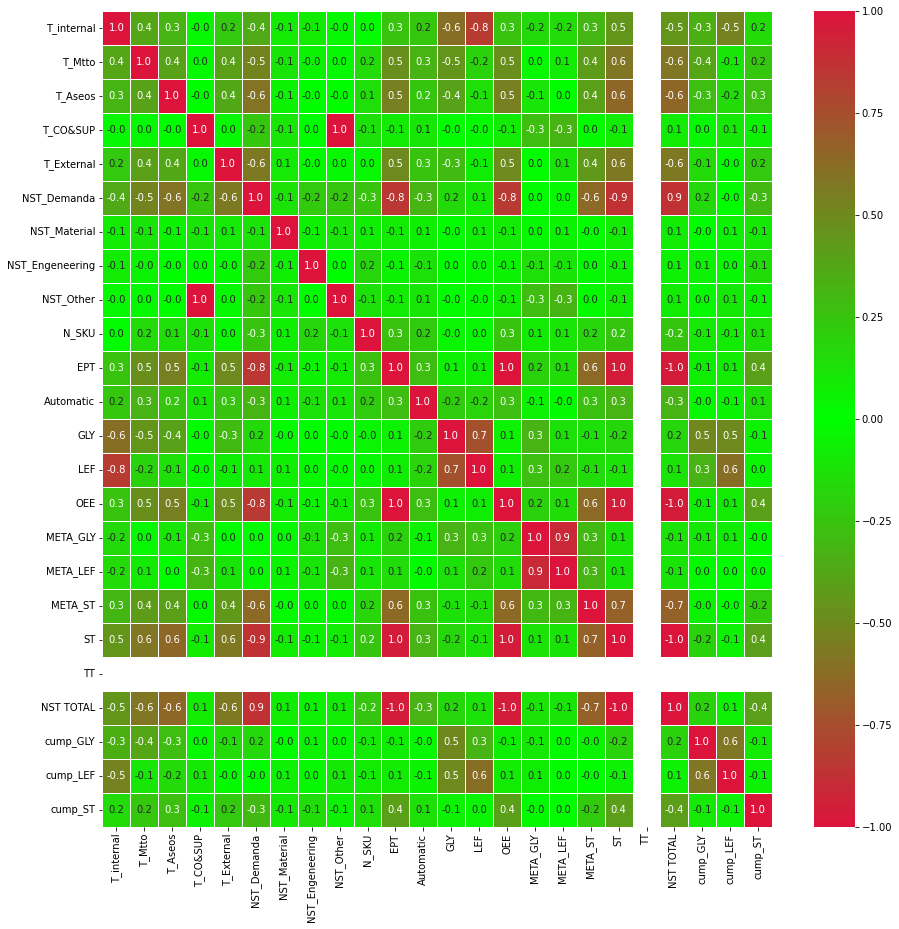

In [130]:
print("Identificación de Correlación entre variables")
# cálculo de la matriz de correlación
corr = datos_c.corr()
fig, ax = plt.subplots(figsize=(15,15))
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['crimson', 'lime', 'crimson'])
ax = sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True, fmt="0.1f", linewidths=.5)
plt.show()

## Tratamiento 1

Se identifica una relación correlación lineal perfecta entre algunas de las variables. se eliminan del dataset para no generar ruido

In [131]:
# Se elimina la columna TT que no aporta varianza al conjunto de datos
datos_c2 = datos_c.drop(columns= ['TT'])

# Se eliminan las variables 'NST TOTAL', 'ST', 'EPT' que estan directamente ligadas a la variable OEE
# Se elimina la variable 'T_CO&SUP' que está directamente ligada a la variable 'NST_Other'
datos_c2.drop(columns = ['NST TOTAL', 'EPT', 'ST', 'T_CO&SUP'], inplace = True)

# Se eliminan las variables relacionadas con LEF dado que se tiene una alta correlación con el GLY
datos_c2.drop(columns = ['LEF', 'META_LEF'], inplace = True)


# Se define la línea como el índice del dataframe
datos_c2.set_axis(datos_c2.LINEA, inplace = True)
datos_c2.drop(columns = ['LINEA'], inplace = True)

datos_c2.head()

T_internal     T_Mtto    T_Aseos  T_External  NST_Demanda  \
LINEA                                                                  
DO31_L501   17.685278   8.558056   6.629444    0.201667   488.385833   
DO31_L502    3.215278   2.116667   2.743056    0.766667   374.889167   
DO31_L503   24.150833  20.743056  10.105556    6.268333   437.123611   
DO31_L505   69.550278  23.278611  18.978056    3.662222    72.071944   
DO31_L506   36.047222  14.161667  12.265000    8.904167   159.293889   

           NST_Material  NST_Engeneering   NST_Other  N_SKU  Automatic   GLY  \
LINEA                                                                          
DO31_L501      4.226389              0.0   47.924444    7.0        1.0  79.0   
DO31_L502      0.000000              0.0  287.342222    3.0        1.0  85.0   
DO31_L503      0.000000              0.0   36.579167    3.0        1.0  74.0   
DO31_L505      0.000000              0.0  196.138611    4.0        1.0  73.0   
DO31_L506     12.183611              0.0  219.646111    4.0        1.0  76.0   

            OEE  META_GLY  META_ST  cump_GLY  cump_LEF   cump_ST  
LINEA                                                             
DO31_L501  21.0    0.0000    0.000  1.000000  1.000000  1.000000  
DO31_L502   9.0    0.0000    0.000  1.000000  1.000000  1.000000  
DO31_L503  27.0   60.8278  432.186  1.216549  1.168612  0.625419  
DO31_L505  47.0   60.6700  418.625  1.203231  1.067318  1.136553  
DO31_L506  36.0   63.2839  609.037  1.200937  1.090056  0.579401

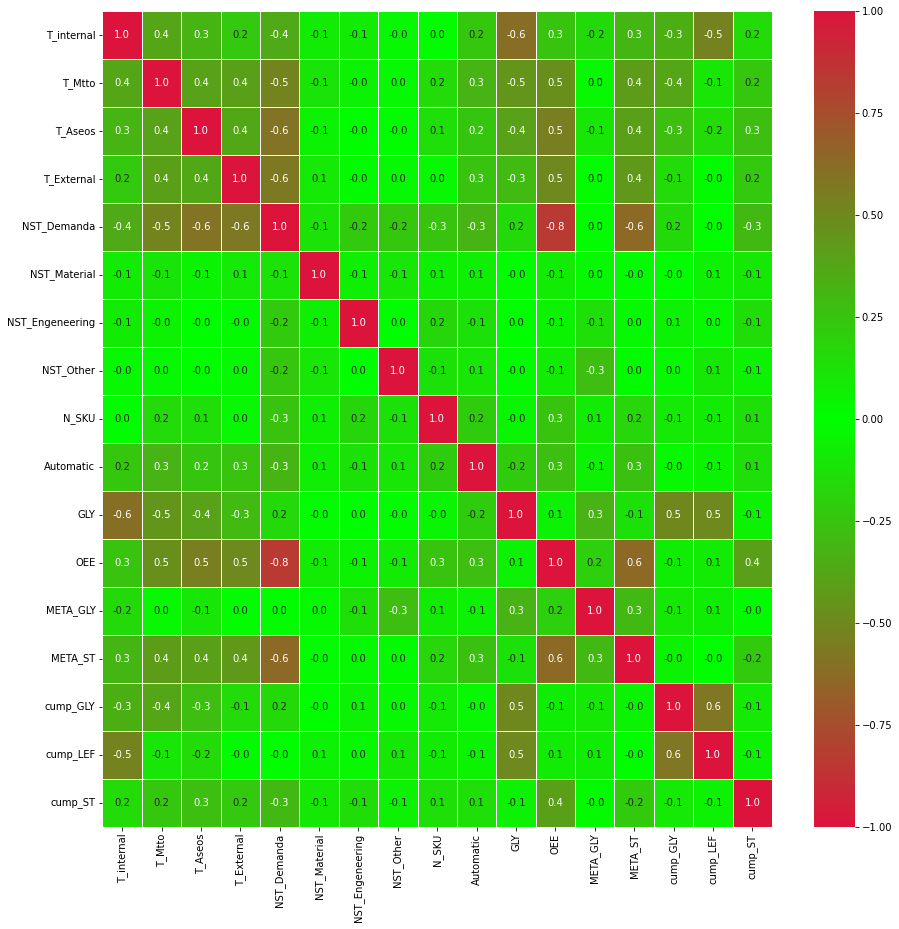

In [132]:
# Se grafica nuevamente la matriz de correlaciones
corr = datos_c2.corr()
fig, ax = plt.subplots(figsize=(15,15))
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['crimson', 'lime', 'crimson'])
ax = sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True, fmt="0.1f", linewidths=.5)
plt.show()

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

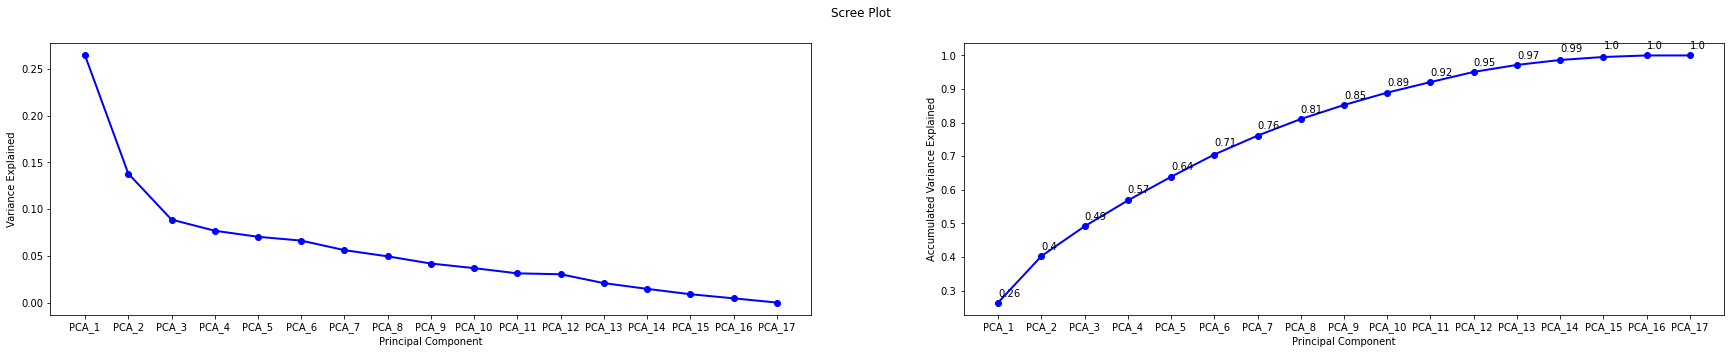

In [134]:
# Inicialmente, se estandarizan los datos para obtener mayor desempeño en el PCA

scaler = StandardScaler()
datos_sta = scaler.fit_transform(datos_c2)
datos_sta = pd.DataFrame(datos_sta, columns = datos_c2.columns)


# Se utiliza PCA para disminuir la dimensión de los datos
pca = PCA()
principalComponents = pca.fit_transform(datos_sta)
principalComponents = pd.DataFrame(principalComponents, columns = ["PCA_"+str(column+1) for column in list(range(0,principalComponents.shape[1]))])

# Se obtiene la varianza explicada por cada componente principal
expl_var = pca.explained_variance_ratio_
acum_expl_var = np.array([])

# Se obtiene la varianza acumulada explicada por componente principal
for pca_i in range(len(expl_var)):
    acum_expl_var = np.append(acum_expl_var, sum(expl_var[:pca_i+1]))


# Se obtiene un gráfico de Scree Plot para identificar el aporte a la varianza total de los componentes principales.
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(30,5))
fig.suptitle('Scree Plot')

ax1.plot(principalComponents.columns, expl_var, 'o-', linewidth=2, color='blue')
ax1.set(xlabel='Principal Component',ylabel = 'Variance Explained')

ax2.plot(principalComponents.columns, acum_expl_var, 'o-', linewidth=2, color='blue')
ax2.set(xlabel='Principal Component',ylabel = 'Accumulated Variance Explained')

for i,j in zip(principalComponents.columns,acum_expl_var):
    ax2.annotate(str(round(j,2)),xy=(i,round(j,2)+0.02))

plt.show()

Con la reducción de dimensión a 11 componentes principales, se logra capturar más del 90% de la varianza del dataset.

In [135]:
PESOS = pd.DataFrame(columns = datos_c2.columns)

# Se obtienen los pesos de los Eigenvectores relacionados con los  Componentes principales contemplados
for ind in range(0,11):
    pesos   = list(np.round(pca.components_[ind],2))
    # Se relacionan los pesos con las variables de la matriz LUGARES
    PESOS.loc["PCA_"+str(ind+1)] = pesos
# Se resaltan los |pesos| superiores a 0.25
PESOS.style.apply(lambda x: ["background: Green" if v > 0.25 or v < -0.25  else "" for v in x], axis = 1)

Se evalúa cuantos clusters generar

In [136]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn_extra.cluster import KMedoids 

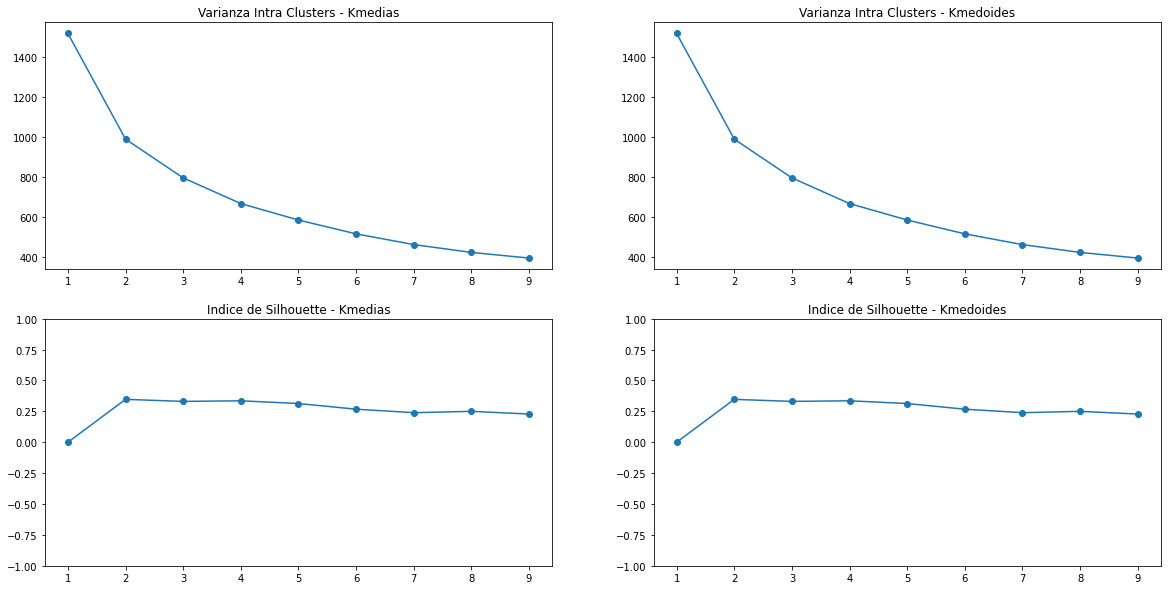

Se obtiene un valor máximo del índice de Silhouette en los siguientes casos para cada algoritmo:
Kmeans - Se obtiene un valor de 0.3472516065404949 al utilizar k =  2
Kmedoides - Se obtiene un valor de 0.3472516065404949 al utilizar k =  2


In [137]:
reduced_data = principalComponents.iloc[:,0:4]

VIC_means = []
SILH_means = []

VIC_medo = []
SILH_medo = []

for k in range (1, 10): # Evaluamos entre 1 a 10 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(reduced_data)
    kmedoi = KMedoids(n_clusters = k, random_state = 0).fit(reduced_data)
    
    VIC_means.append(kmeans.inertia_)
    VIC_medo.append(kmeans.inertia_)
    
    try:
        sil1 = silhouette_score(reduced_data, kmeans.labels_)
        sil2 = silhouette_score(reduced_data, kmeans.labels_)
        
    except:
        sil1 = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
        sil2 = 0
    
    SILH_means.append(sil1)
    SILH_medo.append(sil2)

    
fig, ax = plt.subplots(2, 2, figsize = (20, 10) )

ax[0,0].plot(range(1, 10), VIC_means, marker='o')
ax[0,0].title.set_text('Varianza Intra Clusters - Kmedias')

ax[0,1].plot(range(1, 10), VIC_medo, marker='o')
ax[0,1].title.set_text('Varianza Intra Clusters - Kmedoides')

ax[1,0].plot(range(1, 10), SILH_means, marker='o')
ax[1,0].set_ylim([-1, 1])
ax[1,0].title.set_text('Indice de Silhouette - Kmedias')

ax[1,1].plot(range(1, 10), SILH_medo, marker='o')
ax[1,1].set_ylim([-1, 1])
ax[1,1].title.set_text('Indice de Silhouette - Kmedoides')

plt.show()

print("Se obtiene un valor máximo del índice de Silhouette en los siguientes casos para cada algoritmo:")
print("Kmeans - Se obtiene un valor de", max(SILH_means),"al utilizar k = ",SILH_means.index(max(SILH_means))+1)
print("Kmedoides - Se obtiene un valor de", max(SILH_means),"al utilizar k = ",SILH_means.index(max(SILH_medo))+1)

In [138]:
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation

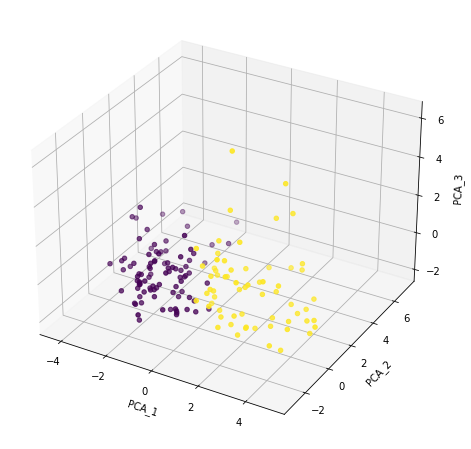

In [139]:
kmedoids_o = KMedoids(n_clusters = 2, random_state= 1, metric = 'euclidean', max_iter = 40)
cluster_med_o = kmedoids_o.fit_predict(reduced_data)

PCA_INT = reduced_data.iloc[:,:3]

# Se genera un gráfico identificando los valores atípicos
fig = plt.figure(figsize=(15,8))
 
# syntax for 3-D projection
ax = fig.add_subplot(111, projection='3d')

x = PCA_INT.iloc[:,0]
y = PCA_INT.iloc[:,1]
z = PCA_INT.iloc[:,2]

ax.scatter(x, y, z, c = cluster_med_o )
   
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')

plt.show()

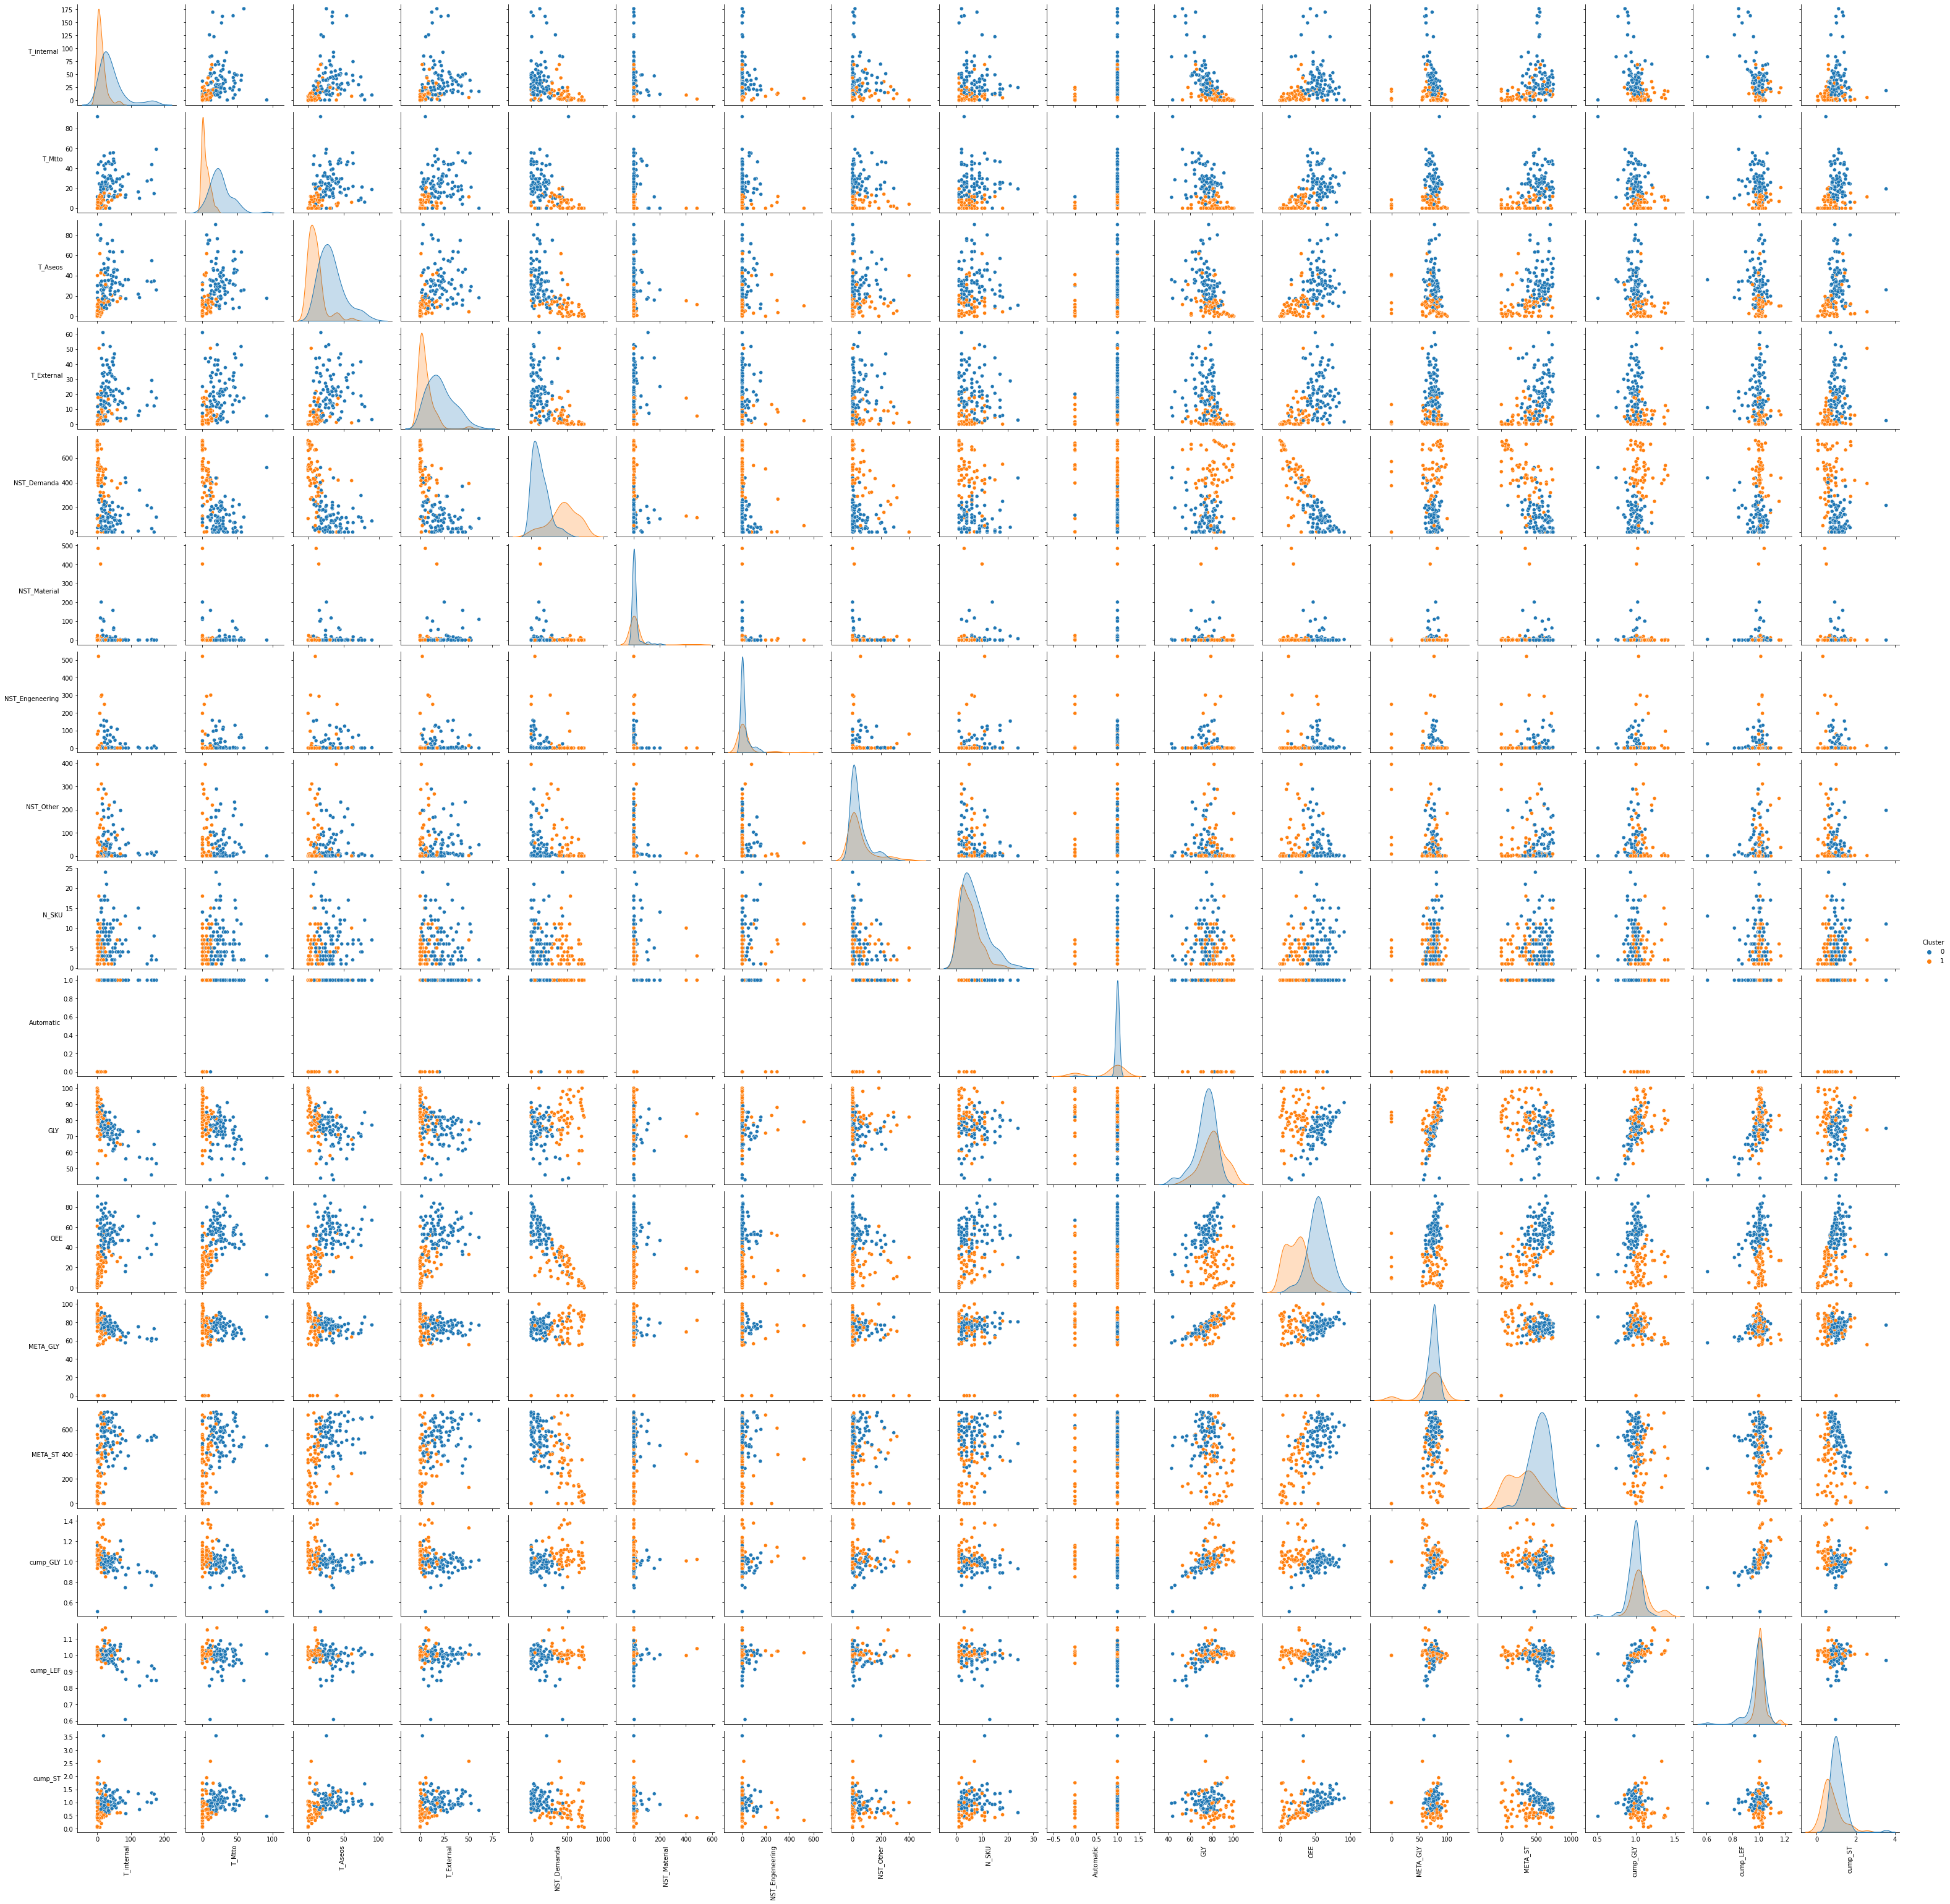

In [140]:
datos_c2['Cluster'] = cluster_med_o

g = sns.pairplot(datos_c2, hue = 'Cluster')
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

La primera agrupación encuentra las líneas que tienen un % programación de producción significativo de aquellas que no.

# Tratamiento 2

De acuerdo con el objetivo definido para el negocio, se desea agrupar las líneas de acuerdo son su productividad, considerando también los objetivos y cumplimiento que fueron definidos para tiempos productivos y productividad.

De acuerdo a lo anterior, se realiza una limpieza de dimensiones que aportan ruido al análisis.

In [141]:
# Se elimina la columna TT que no aporta varianza al conjunto de datos, es un valor constante
datos_c3 = datos_c.drop(columns= ['TT'])

# Se eliminan las variables 'NST TOTAL', 'ST', 'EPT' que estan directamente ligadas a la variable OEE
datos_c3.drop(columns = ['NST TOTAL', 'EPT', 'ST'], inplace = True)

# Se elimina la variable 'T_CO&SUP' que está directamente ligada a la variable 'NST_Other'
datos_c3.drop(columns = ['T_CO&SUP'], inplace = True)

# Se eliminan las variables asociadas con el indicador LEF, las acuales están relacionadas en gran medida con el indicador GLY 
datos_c3.drop(columns = ['LEF', 'META_LEF', 'cump_LEF'], inplace = True)

# Se eliminan las variables relacionadas con tiempos de parada perdidos y planeados | se utilizarán para un análisis posterior 
datos_c3.drop(columns = ['T_internal', 'T_Mtto', 'T_Aseos', 'T_External'], inplace = True)

# Se elimina la variable 'Automatic' dado que la recolecta automática de tiempos no clasifica los tiempos en las diferentes categorías, por lo cual no aporta valor al análisis.
datos_c3.drop(columns = ['Automatic'], inplace = True)
 
# Se elimina las variable NST_Demanda y META_ST fuertemente relacionadas con OEE
datos_c3.drop(columns = ['NST_Demanda', 'META_ST'], inplace = True)

#-----
# Se elimina en número de SKUs | Se utilizará en un análisis posterior
datos_c3.drop(columns = ['N_SKU'], inplace = True)
#-----

#-----
# Se elimina tiempos de NST
datos_c3.drop(columns = ['NST_Material',	'NST_Engeneering',	'NST_Other'], inplace = True)
#-----


# Se define la línea como el índice del dataframe
datos_c3.set_axis(datos_c3.LINEA, inplace = True)
datos_c3.drop(columns = ['LINEA'], inplace = True)

datos_c3.head()

GLY   OEE  META_GLY  cump_GLY   cump_ST
LINEA                                              
DO31_L501  79.0  21.0    0.0000  1.000000  1.000000
DO31_L502  85.0   9.0    0.0000  1.000000  1.000000
DO31_L503  74.0  27.0   60.8278  1.216549  0.625419
DO31_L505  73.0  47.0   60.6700  1.203231  1.136553
DO31_L506  76.0  36.0   63.2839  1.200937  0.579401

Se genera un nuevo mapa de correlación entre variables.

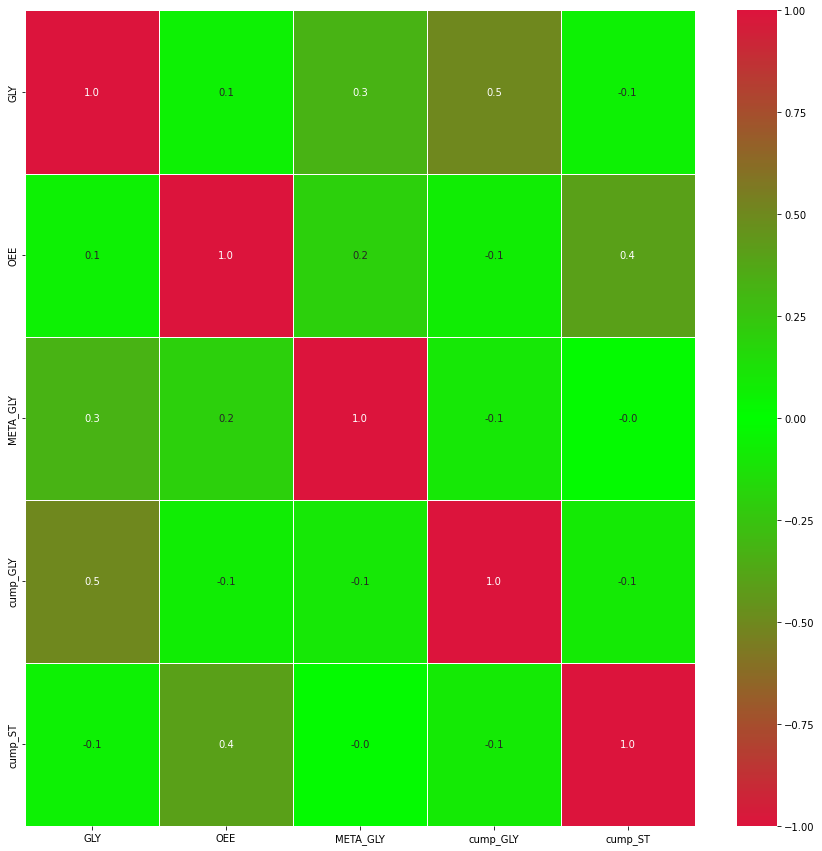

In [142]:
corr = datos_c3.corr()
fig, ax = plt.subplots(figsize=(15,15))
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['crimson', 'lime', 'crimson'])
ax = sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True, fmt="0.1f", linewidths=.5)
plt.show()

In [143]:
def generar_descriptivo_variable(datos_c3,a):

    fig, ax = plt.subplots(nrows=1,ncols=2, figsize = (10,4))
    sns.histplot(datos_c3.iloc[:,a],ax = ax[0])
    sns.boxplot(datos_c3.iloc[:,a],ax = ax[1])
    plt.suptitle('Análisis de la variable {}'.format(datos_c3.iloc[:,a].name))
    return plt.show()



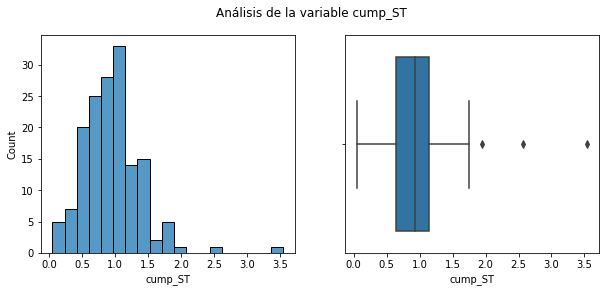

In [144]:
generar_descriptivo_variable(datos_c3, 4)

### Estandarización y componentes principales

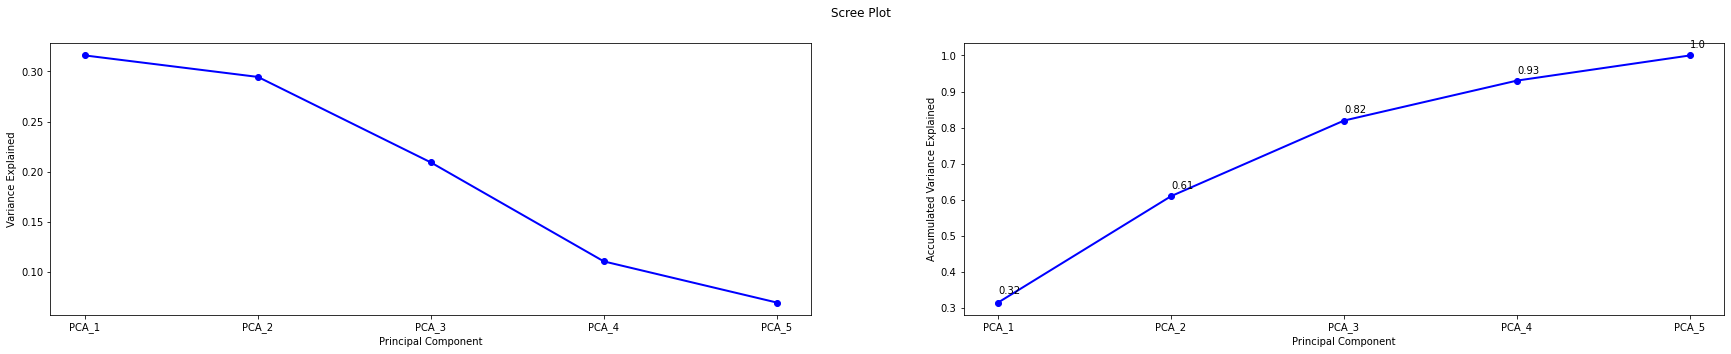

In [145]:
# Inicialmente, se estandarizan los datos para obtener mayor desempeño en el PCA
scaler = StandardScaler()
datos_sta = scaler.fit_transform(datos_c3)
datos_sta = pd.DataFrame(datos_sta, columns = datos_c3.columns)


# Se utiliza PCA para disminuir la dimensión de los datos
pca = PCA()
principalComponents = pca.fit_transform(datos_sta)
principalComponents = pd.DataFrame(principalComponents, columns = ["PCA_"+str(column+1) for column in list(range(0,principalComponents.shape[1]))])

# Se obtiene la varianza explicada por cada componente principal
expl_var = pca.explained_variance_ratio_
acum_expl_var = np.array([])

# Se obtiene la varianza acumulada explicada por componente principal
for pca_i in range(len(expl_var)):
    acum_expl_var = np.append(acum_expl_var, sum(expl_var[:pca_i+1]))


# Se obtiene un gráfico de Scree Plot para identificar el aporte a la varianza total de los componentes principales.
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(30,5))
fig.suptitle('Scree Plot')

ax1.plot(principalComponents.columns, expl_var, 'o-', linewidth=2, color='blue')
ax1.set(xlabel='Principal Component',ylabel = 'Variance Explained')

ax2.plot(principalComponents.columns, acum_expl_var, 'o-', linewidth=2, color='blue')
ax2.set(xlabel='Principal Component',ylabel = 'Accumulated Variance Explained')

for i,j in zip(principalComponents.columns,acum_expl_var):
    ax2.annotate(str(round(j,2)),xy=(i,round(j,2)+0.02))

plt.show()

Se obtienen los pesos asociados en cada combinación lineal entre variables para la definición de componentes principales

In [146]:
# Se genera un DataFrame donde se presentará la información
PESOS = pd.DataFrame(columns = datos_c3.columns)
    # Se define el número de columnas
N_components = len(datos_c3.columns)-1

# Se obtienen los pesos de los Eigenvectores relacionados con los  Componentes principales contemplados
for ind in range(0,N_components):
    pesos   = list(np.round(pca.components_[ind],2))
    # Se relacionan los pesos con las variables de la matriz de de datos.
    PESOS.loc["PCA_"+str(ind+1)] = pesos

# Se muestran los |pesos| y se resaltan aquellos superiores a 0.25 dado que son los de mayor significancia
PESOS.style.apply(lambda x: ["background: Green" if v > 0.25 or v < -0.25  else "" for v in x], axis = 1)

Se define la cantidad de componentes relevantes a trabajar

In [147]:
# Número de componentes relevantes
n = 4

principalComponents = principalComponents.iloc[:,0:n]
principalComponents.head()


PCA_1     PCA_2     PCA_3     PCA_4
0  1.199877 -2.371382  3.166054 -0.164079
1  0.764346 -2.659332  3.097036  0.314357
2 -0.920549 -1.438937  1.077849 -0.378268
3 -0.476542 -0.155357  1.663564 -0.303725
4 -1.006407 -1.098868  0.900070 -0.666705

### Interpretación de los componentes relevantes

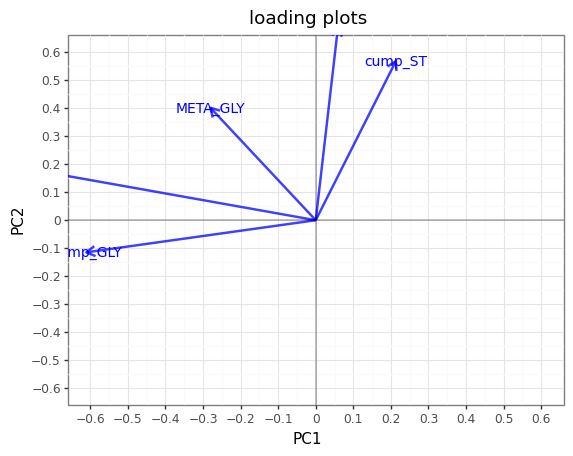

<ggplot: (703386609)>

In [148]:
pca = PCA(n_components=4)
pca.fit(datos_sta)
datapc = pd.DataFrame(pca.components_.transpose(),columns=["PC1","PC2","PC3","PC4"])
datapc['varNames']=datos_sta.columns
datapc
(ggplot(datapc)+
  theme_bw()+
  labs(title="loading plots")+
  geom_text(aes(x="PC1", y="PC2", label="varNames"), size = 10, color="blue")+
  geom_segment(aes(x=0, y=0, xend="PC1", yend="PC2"), arrow=arrow(length=0.1),size=1, alpha=0.75, color="blue")+
  scale_x_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])+
  scale_y_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])+
  geom_hline(yintercept = 0, size=.2)+
  geom_vline(xintercept = 0, size=.2)+
  coord_cartesian([-0.6,0.6],[-0.6,0.6])
)

In [186]:
def evaluar_cluster(principalComponents):
    VIC_means = []
    SILH_means = []

    VIC_medo = []
    SILH_medo = []

    for k in range (1, 10): # Evaluamos entre 1 a 10 clusters posibles
        kmeans = KMeans(n_clusters = k, random_state = 0).fit(principalComponents)
        kmedoi = KMedoids(n_clusters = k, random_state = 0).fit(principalComponents)
        
        VIC_means.append(kmeans.inertia_)
        VIC_medo.append(kmeans.inertia_)
        
        try:
            sil1 = silhouette_score(principalComponents, kmeans.labels_)
            sil2 = silhouette_score(principalComponents, kmeans.labels_)
            
        except:
            sil1 = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
            sil2 = 0
        
        SILH_means.append(sil1)
        SILH_medo.append(sil2)

        
    fig, ax = plt.subplots(2, 2, figsize = (20, 10) )

    ax[0,0].plot(range(1, 10), VIC_means, marker='o')
    ax[0,0].title.set_text('Varianza Intra Clusters - Kmedias')

    ax[0,1].plot(range(1, 10), VIC_medo, marker='o')
    ax[0,1].title.set_text('Varianza Intra Clusters - Kmedoides')

    ax[1,0].plot(range(1, 10), SILH_means, marker='o')
    ax[1,0].set_ylim([0, 1])
    ax[1,0].title.set_text('Indice de Silhouette - Kmedias')

    ax[1,1].plot(range(1, 10), SILH_medo, marker='o')
    ax[1,1].set_ylim([0, 1])
    ax[1,1].title.set_text('Indice de Silhouette - Kmedoides')

    print("Se obtiene un valor máximo del índice de Silhouette en los siguientes casos para cada algoritmo:")
    print("Kmeans - Se obtiene un valor de", max(SILH_means),"al utilizar k = ",SILH_means.index(max(SILH_means))+1)
    print("Kmedoides - Se obtiene un valor de", max(SILH_means),"al utilizar k = ",SILH_means.index(max(SILH_medo))+1)


    return plt.show(), SILH_means, SILH_medo



Se obtiene un valor máximo del índice de Silhouette en los siguientes casos para cada algoritmo:
Kmeans - Se obtiene un valor de 0.3484786040904206 al utilizar k =  6
Kmedoides - Se obtiene un valor de 0.3484786040904206 al utilizar k =  6


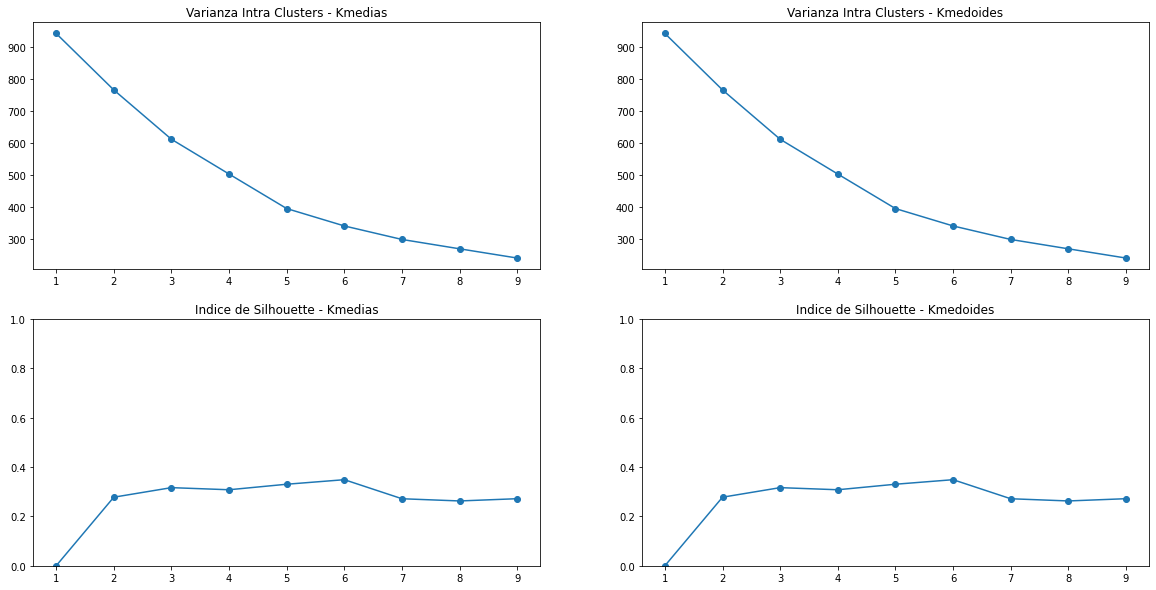

(None,
 [0,
  0.2776127773954885,
  0.3163057897482333,
  0.3077696338285056,
  0.33010680595561415,
  0.3484786040904206,
  0.2713752967782822,
  0.2624424764501303,
  0.27156628754496004],
 [0,
  0.2776127773954885,
  0.3163057897482333,
  0.3077696338285056,
  0.33010680595561415,
  0.3484786040904206,
  0.2713752967782822,
  0.2624424764501303,
  0.27156628754496004])

In [187]:
scaler = StandardScaler()
datos_sta = pd.DataFrame(scaler.fit_transform(datos_c3), columns = datos_c3.columns)
evaluar_cluster(datos_sta)

### Agrupación a través de K-Medoids

In [151]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn_extra.cluster import KMedoids

Se realiza la clusterización a través del método de KMedoids

In [152]:
kmedoids_o = KMedoids(n_clusters = 3, random_state= 1, metric = 'euclidean', max_iter = 100)
cluster_med_o = kmedoids_o.fit_predict(datos_sta)

### Agrupación a través de K-Means

In [153]:
from sklearn.cluster import KMeans

In [154]:
kmeans_o = KMeans(n_clusters = 3, random_state= 1, algorithm= 'auto', n_init = 10).fit(datos_sta)
cluster_mean_o = kmeans_o.predict(datos_sta)

### Agrupación a través de DBSCAN

Se realiza la clusterización a través del método de KMedoids

In [155]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

from kneed import KneeLocator

In [156]:

# Clusterización a partir de DDBSCAN
    # Se identifica el número óptimo de eps
neigh_Sca = NearestNeighbors(n_neighbors = 5)
nbrs_Sca = neigh_Sca.fit(np.array(datos_sta))
distancias_Sca, indices_Sca = nbrs_Sca.kneighbors(np.array(datos_sta))
distancias_Sca = np.sort(distancias_Sca.flatten())
i = np.arange(len(distancias_Sca))
knee_Sca = KneeLocator(i, distancias_Sca, S=1, curve='convex', direction='increasing', interp_method='polynomial')
EPS_Sca = distancias_Sca[knee_Sca.knee]

# Se realiza la clusterización haciendo uso del valor óptimo calculado para eps.
db_Sca = DBSCAN(eps = EPS_Sca, min_samples = 5, metric = 'euclidean').fit(np.array(datos_sta))
clusteres_Sca = db_Sca.labels_


In [157]:
print(EPS_Sca)

1.2989673774572663


## Gráficos de interpretación

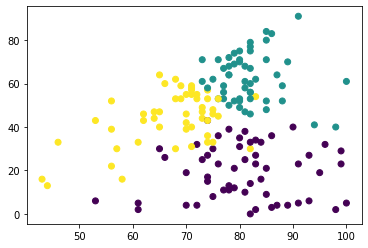

In [158]:
#1. KMedoides
color = cluster_med_o

#2. DBSCAN
#color = clusteres_Sca

#3. KMedias
#color = cluster_mean_o

plt.scatter(datos_c3.GLY, datos_c3.OEE, c = color)

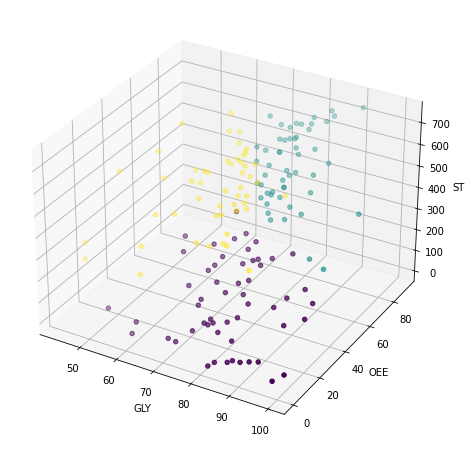

In [159]:
# Se genera un gráfico identificando los valores atípicos
fig = plt.figure(figsize=(15,8))
 
# syntax for 3-D projection
ax = fig.add_subplot(111, projection='3d')

x = datos_c.GLY
y = datos_c.OEE
z = datos_c.ST

ax.scatter(x, y, z, c = color)
   
ax.set_xlabel('GLY')
ax.set_ylabel('OEE')
ax.set_zlabel('ST')

plt.show()

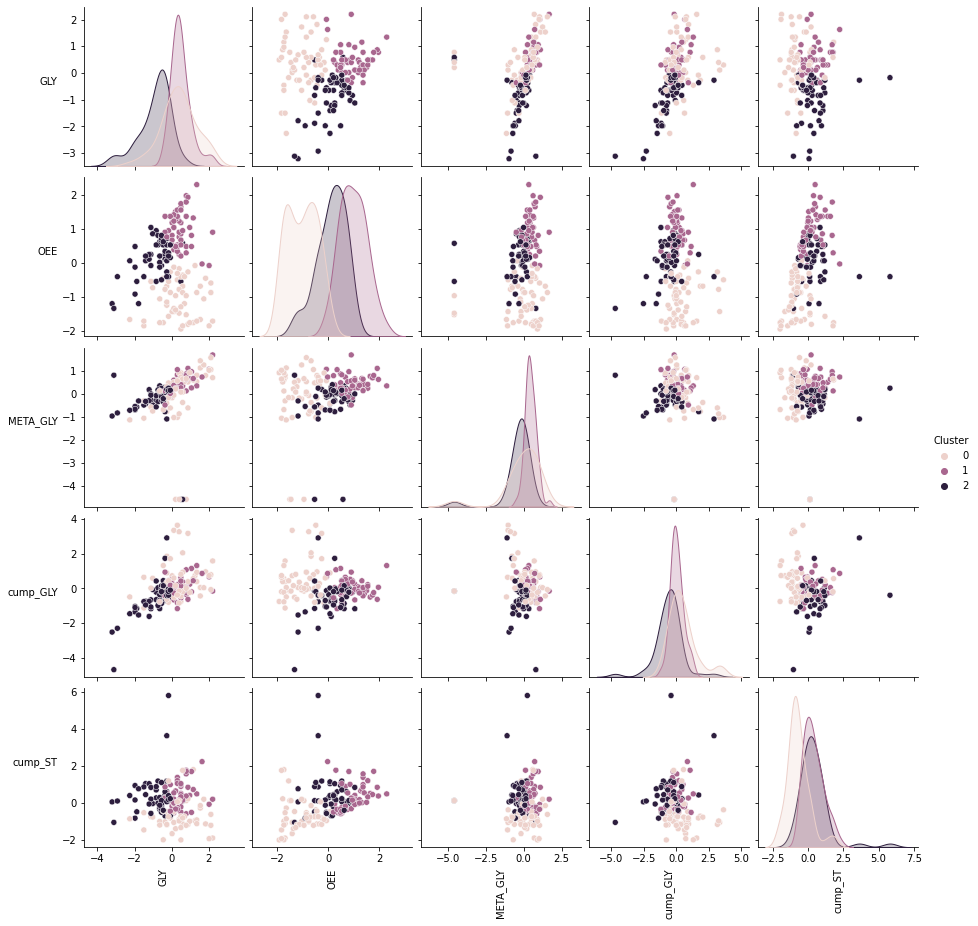

In [160]:

datos_sta.loc[:,'Cluster'] = cluster_med_o

g = sns.pairplot(datos_sta, hue = 'Cluster')
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

In [161]:
def generar_interpretacion(datos_c3, cluster_med_o,modelo):
    datos_c3['Cluster'] = cluster_med_o
    df = datos_c3.melt(id_vars='Cluster')

    return ggplot(df, aes(x='factor(Cluster)', y='value')) \
        + stat_summary(geom='geom_errorbar') +stat_summary(geom='point') \
        + facet_wrap('variable', scales='free_y')  + theme(figure_size=(10,10),subplots_adjust={'wspace': 0.25}) \
        + ggtitle('Intrepretación según modelo:{}'.format(modelo))

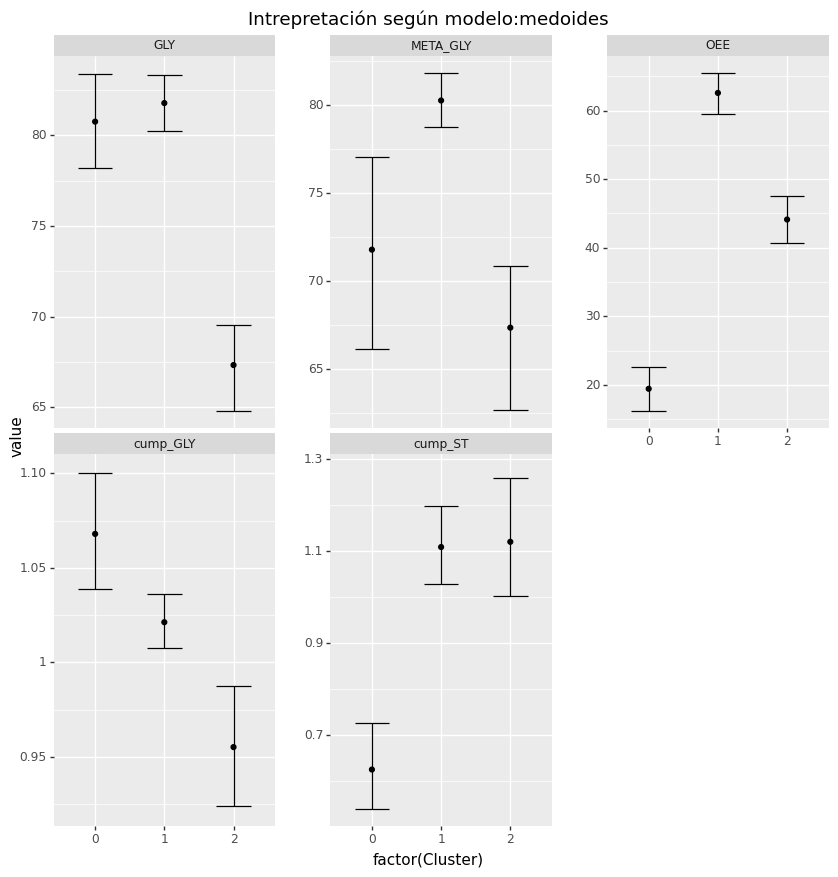

<ggplot: (740865913)>

In [162]:
generar_interpretacion(datos_c3, cluster_med_o, 'medoides')


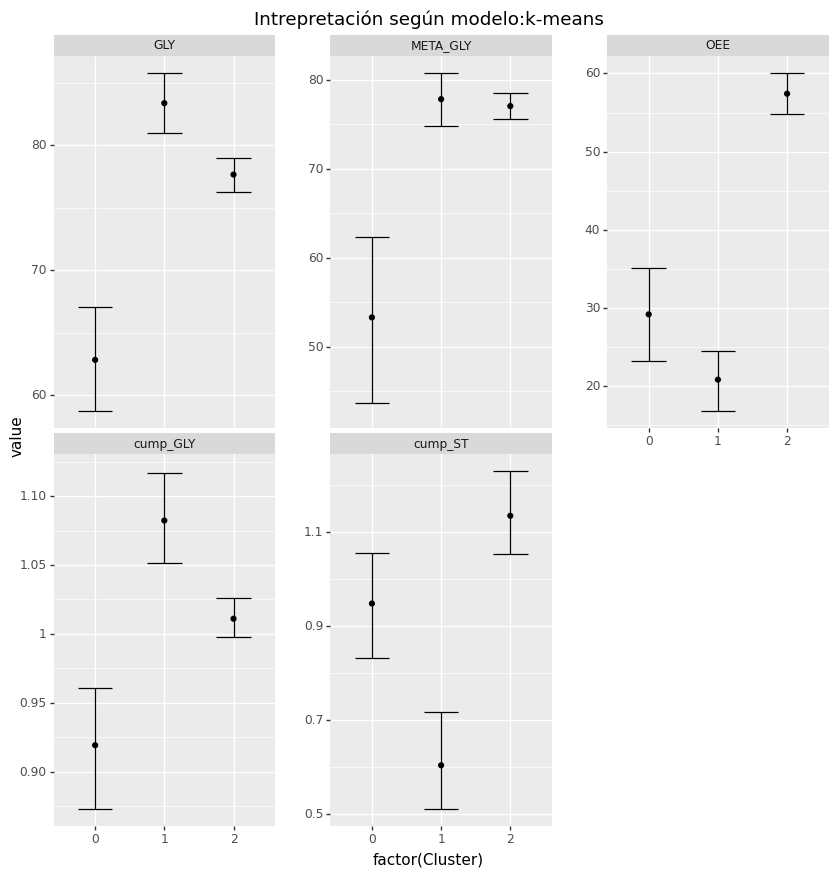

<ggplot: (733052844)>

In [163]:
generar_interpretacion(datos_c3, cluster_mean_o, 'k-means')

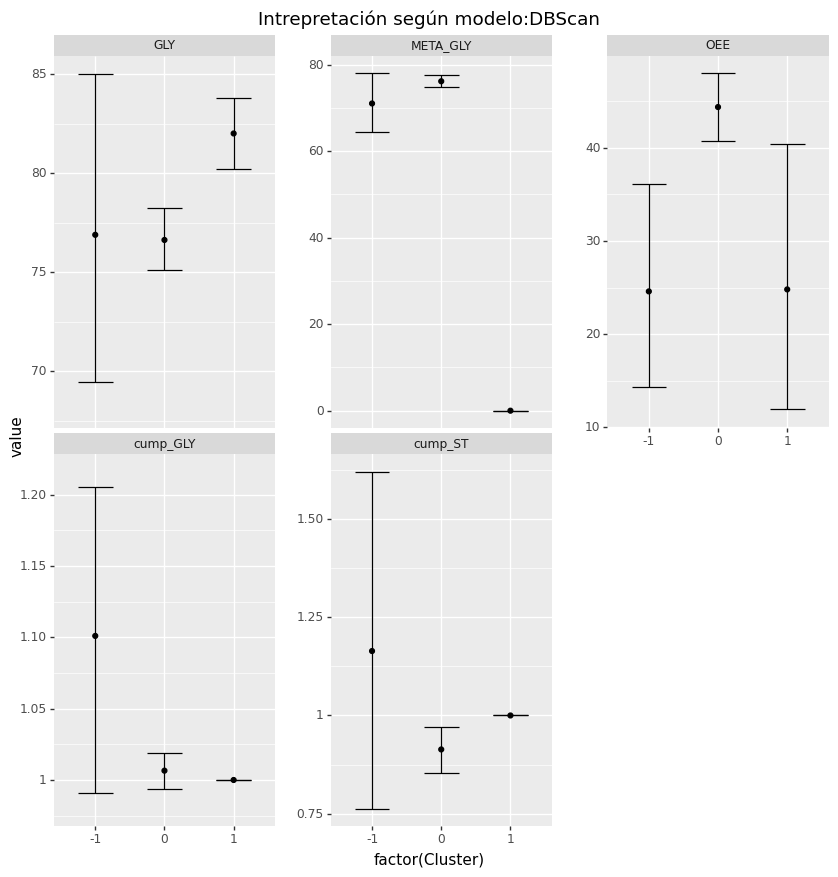

<ggplot: (732932850)>

In [164]:
generar_interpretacion(datos_c3, clusteres_Sca, 'DBScan')

Text(0.5, 1.0, 'Distribución de casos DBScan')

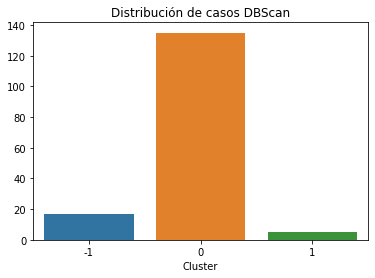

In [195]:
datos_c3['Cluster'] = clusteres_Sca
sns.barplot(x = datos_c3[['Cluster']].groupby('Cluster').value_counts().index, y = datos_c3[['Cluster']].groupby('Cluster').value_counts().values )
plt.title('Distribución de casos DBScan')

Text(0.5, 1.0, 'Distribución de casos KMedoides')

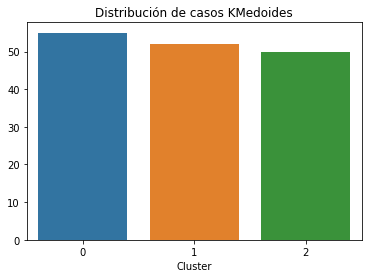

In [200]:
datos_c3['Cluster'] = cluster_med_o
sns.barplot(x = datos_c3[['Cluster']].groupby('Cluster').value_counts().index, y = datos_c3[['Cluster']].groupby('Cluster').value_counts().values )
plt.title('Distribución de casos KMedoides')

Text(0.5, 1.0, 'Distribución de casos KMeans')

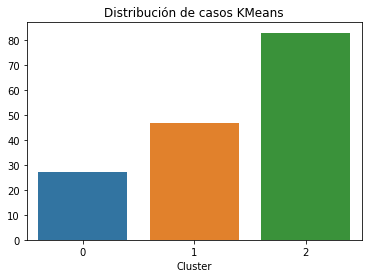

In [199]:
datos_c3['Cluster'] = cluster_mean_o
sns.barplot(x = datos_c3[['Cluster']].groupby('Cluster').value_counts().index, y = datos_c3[['Cluster']].groupby('Cluster').value_counts().values )
plt.title('Distribución de casos KMeans')

#### Interpretación

Después de varias iteraciones, se generaron 03 modelos después de haber realizado el escalamiento. No se aplicó PCA porque solamente se consideraron 5 variables, por lo que no se consideró necesario:

* Modelo 1: `k means` con 3 clústeres a los datos escalados.
* Modelo 2: `k medoids` con 3 clústeres a los datos escalados.
* Modelo 3: `BDScan` con `eps = 1.2989673774572663`, `min_samples = 5` y `distance = euclidean`.